C:\Users\gauoo\AppData\Local\Temp\ipykernel_35948\2679128958.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


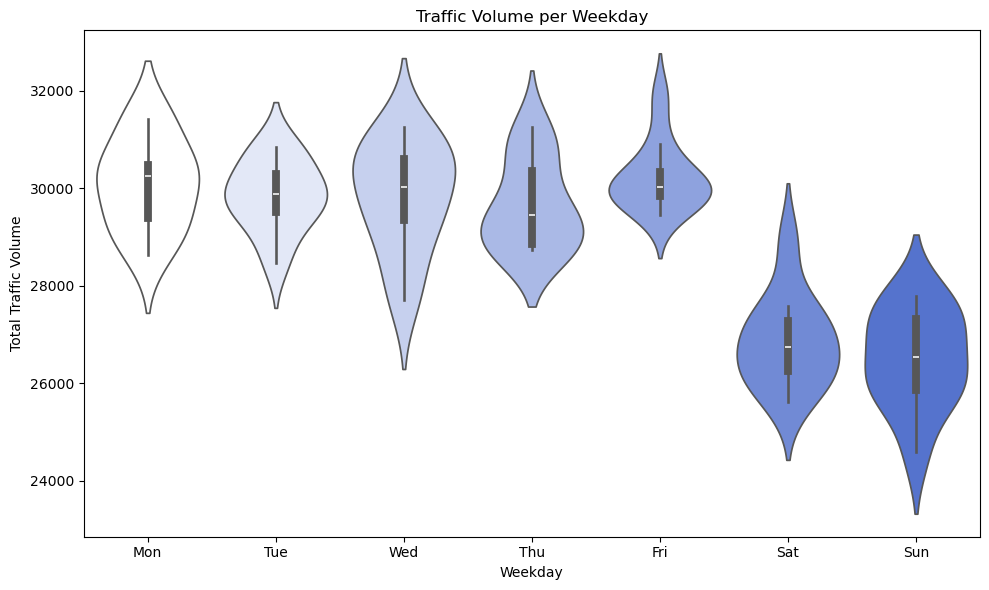

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import seaborn as sns
from math import ceil

# 1. Data loading
traffic_data = np.load('../src/dataset/traffic_dataset_13_smoothen.npy')  # shape (T, E, 3)

# 2. Parameter setup
steps_per_day = 8 * 60  # number of time steps per day
total_steps = traffic_data.shape[0]  # total time steps (e.g., 33600)
num_days = total_steps // steps_per_day  # number of full days

# 3. Compute daily total traffic volume (assuming channel 0 is volume)
daily_total_volumes = []
for day in range(num_days):
    # slice for this day: start index = day * steps_per_day, end index = (day + 1) * steps_per_day
    day_slice = slice(day * steps_per_day, (day + 1) * steps_per_day)
    # sum volume over all time steps and all edges
    daily_sum = np.sum(traffic_data[day_slice, :, 0])
    daily_total_volumes.append(daily_sum)

# 4. Weekday assignment
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week = [weekdays[day % 7] for day in range(num_days)]

# 5. Create result DataFrame
df = pd.DataFrame({
    'Day': range(1, num_days + 1),
    'Weekday': day_of_week,
    'TotalVolume': daily_total_volumes  
})

# 6. Create a linear colormap from white to royal blue
cmap = mcolors.LinearSegmentedColormap.from_list(
    'WhiteToRoyalBlue',
    ['#FFFFFF', '#4169E1']  # start color, end color
)

# 7. Extract a distinct color for each weekday
day2color = {}
for i, wd in enumerate(weekdays):
    # map i in [0, 6] to [0.0, 1.0]
    ratio = i / (len(weekdays) - 1)
    day2color[wd] = cmap(ratio)  # returns an (R, G, B, A) tuple

# 8. Plot violin plot with weekday-based palette
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Weekday',
    y='TotalVolume',
    data=df,
    order=weekdays,       # specify weekday order
    palette=day2color     # map each weekday to its color
)

plt.title('Traffic Volume per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Traffic Volume')
plt.tight_layout()
plt.show()


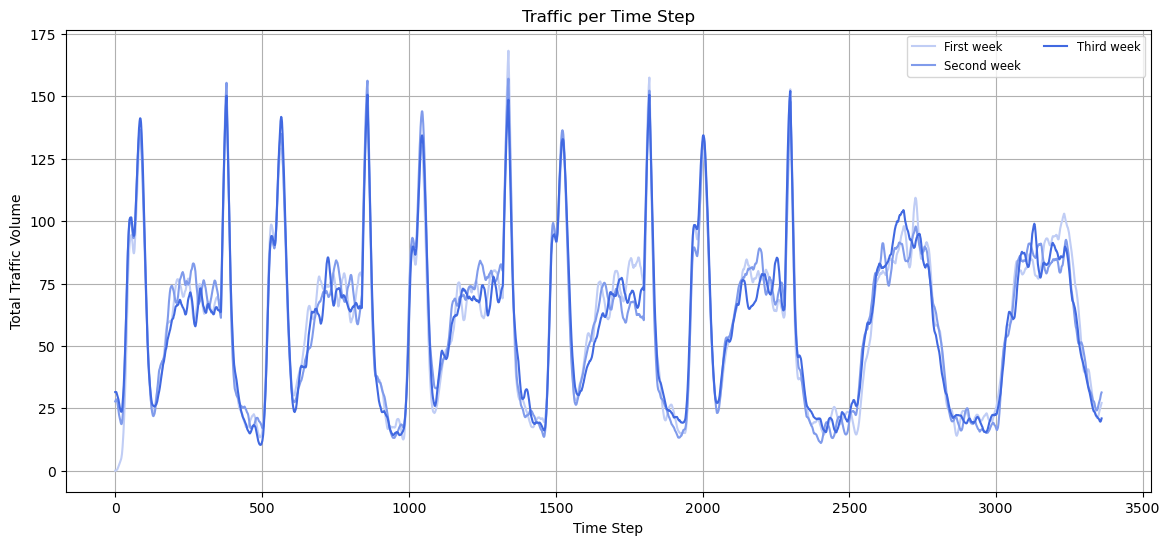

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Use data for only 3 weeks (21 days)
step_total_volume = []
for step in range(len(traffic_data)):
    step_total_volume.append(sum(traffic_data[step, :, 0]))

# Split into first, second, and third week
first_week  = step_total_volume[:(steps_per_day * 7)]
second_week = step_total_volume[(steps_per_day * 7):(steps_per_day * 14)]
third_week  = step_total_volume[(steps_per_day * 14):(steps_per_day * 21)]

# Weekday order and corresponding HEX colors
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_colors = {
    'Mon': '#FFFFFF',
    'Tue': '#E0E6FA',
    'Wed': '#C0CDF5',
    'Thu': '#A0B4F0',
    'Fri': '#809BEB',
    'Sat': '#6082E6',
    'Sun': '#4169E1'
}

def plot_week(week_data, week_label, x_offset=0, steps_per_day=steps_per_day):
    """
    Helper function to plot one week's data by weekday.
    
    week_data: data for one week (7 days × steps_per_day steps)
    week_label: e.g., '1st week'
    x_offset: horizontal offset between weeks on the x-axis
    """
    for i, day in enumerate(weekdays):
        start = i * steps_per_day
        end = (i + 1) * steps_per_day
        x = np.arange(start + x_offset, end + x_offset)
        # Plot each day segment with its weekday color
        plt.plot(
            x,
            week_data[start:end],
            color=day_colors[day],
            label=f'{week_label} - {day}' if x_offset == 0 else None
        )

# Visualization
plt.figure(figsize=(14, 6))

plt.plot(first_week,  label='First week',  color=day_colors['Wed'])
plt.plot(second_week, label='Second week', color=day_colors['Fri'])
plt.plot(third_week,  label='Third week',  color=day_colors['Sun'])

plt.title('Traffic per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Total Traffic Volume')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()


In [4]:
# map info
converted_nodes = [{'id': 0, 'type': 'H', 'coords': (10, 10)}, {'id': 1, 'type': 'I', 'coords': (5, 8)}, {'id': 2, 'type': 'S', 'coords': (7, 2)}, {'id': 3, 'type': 'C', 'coords': (6, 0)}, {'id': 4, 'type': 'S', 'coords': (2, 7)}, {'id': 5, 'type': 'C', 'coords': (5, 0)}, {'id': 6, 'type': 'S', 'coords': (2, 2)}, {'id': 7, 'type': 'I', 'coords': (4, 9)}, {'id': 8, 'type': 'O', 'coords': (1, 1)}, {'id': 9, 'type': 'C', 'coords': (5, 1)}, {'id': 10, 'type': 'R', 'coords': (7, 1)}, {'id': 11, 'type': 'R', 'coords': (9, 3)}, {'id': 12, 'type': 'I', 'coords': (4, 8)}, {'id': 13, 'type': 'S', 'coords': (7, 7)}, {'id': 14, 'type': 'C', 'coords': (8, 4)}, {'id': 15, 'type': 'O', 'coords': (2, 1)}, {'id': 16, 'type': 'R', 'coords': (8, 1)}, {'id': 17, 'type': 'R', 'coords': (8, 2)}, {'id': 18, 'type': 'C', 'coords': (1, 3)}, {'id': 19, 'type': 'R', 'coords': (9, 4)}]
converted_edges = [{'start': 0, 'end': 7, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 7, 'end': 0, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 1, 'end': 12, 'distance': 2.0, 'road_type': 'urban'}, {'start': 12, 'end': 1, 'distance': 2.0, 'road_type': 'urban'}, {'start': 2, 'end': 6, 'distance': 10.0, 'road_type': 'highway'}, {'start': 6, 'end': 2, 'distance': 10.0, 'road_type': 'highway'}, {'start': 2, 'end': 13, 'distance': 10.0, 'road_type': 'highway'}, {'start': 13, 'end': 2, 'distance': 10.0, 'road_type': 'highway'}, {'start': 2, 'end': 17, 'distance': 2.0, 'road_type': 'urban'}, {'start': 17, 'end': 2, 'distance': 2.0, 'road_type': 'urban'}, {'start': 3, 'end': 5, 'distance': 2.0, 'road_type': 'urban'}, {'start': 5, 'end': 3, 'distance': 2.0, 'road_type': 'urban'}, {'start': 4, 'end': 6, 'distance': 10.0, 'road_type': 'highway'}, {'start': 6, 'end': 4, 'distance': 10.0, 'road_type': 'highway'}, {'start': 4, 'end': 7, 'distance': 5.656854249492381, 'road_type': 'urban'}, {'start': 7, 'end': 4, 'distance': 5.656854249492381, 'road_type': 'urban'}, {'start': 4, 'end': 13, 'distance': 10.0, 'road_type': 'highway'}, {'start': 13, 'end': 4, 'distance': 10.0, 'road_type': 'highway'}, {'start': 5, 'end': 6, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 6, 'end': 5, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 5, 'end': 9, 'distance': 2.0, 'road_type': 'urban'}, {'start': 9, 'end': 5, 'distance': 2.0, 'road_type': 'urban'}, {'start': 5, 'end': 15, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 15, 'end': 5, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 5, 'end': 17, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 17, 'end': 5, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 6, 'end': 15, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 6, 'distance': 2.0, 'road_type': 'urban'}, {'start': 6, 'end': 18, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 18, 'end': 6, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 7, 'end': 12, 'distance': 2.0, 'road_type': 'urban'}, {'start': 12, 'end': 7, 'distance': 2.0, 'road_type': 'urban'}, {'start': 8, 'end': 15, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 8, 'distance': 2.0, 'road_type': 'urban'}, {'start': 10, 'end': 16, 'distance': 2.0, 'road_type': 'urban'}, {'start': 16, 'end': 10, 'distance': 2.0, 'road_type': 'urban'}, {'start': 10, 'end': 17, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 17, 'end': 10, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 11, 'end': 19, 'distance': 2.0, 'road_type': 'urban'}, {'start': 19, 'end': 11, 'distance': 2.0, 'road_type': 'urban'}, {'start': 13, 'end': 14, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 14, 'end': 13, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 14, 'end': 17, 'distance': 4.0, 'road_type': 'urban'}, {'start': 17, 'end': 14, 'distance': 4.0, 'road_type': 'urban'}, {'start': 14, 'end': 18, 'distance': 14.142135623730951, 'road_type': 'urban'}, {'start': 18, 'end': 14, 'distance': 14.142135623730951, 'road_type': 'urban'}, {'start': 14, 'end': 19, 'distance': 2.0, 'road_type': 'urban'}, {'start': 19, 'end': 14, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 17, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 17, 'end': 15, 'distance': 12.165525060596439, 'road_type': 'urban'}]

adj = [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0.],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0.],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0.],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1.],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0.]]

random_prob = {'R': 0.16, 'I': 0.1, 'C': 0.1, 'O': 0.1, 'H': 0.3, 'S': 0.0, 'day_night_ratio': 0.25, 'step_of_visit': 20}

edge_idx_map = {(0, 7): 0, (7, 0): 1, (1, 12): 2, (12, 1): 3, (2, 6): 4, (6, 2): 5, (2, 13): 6, (13, 2): 7, (2, 17): 8, (17, 2): 9, (3, 5): 10, (5, 3): 11, (4, 6): 12, (6, 4): 13, (4, 7): 14, (7, 4): 15, (4, 13): 16, (13, 4): 17, (5, 6): 18, (6, 5): 19, (5, 9): 20, (9, 5): 21, (5, 15): 22, (15, 5): 23, (5, 17): 24, (17, 5): 25, (6, 15): 26, (15, 6): 27, (6, 18): 28, (18, 6): 29, (7, 12): 30, (12, 7): 31, (8, 15): 32, (15, 8): 33, (10, 16): 34, (16, 10): 35, (10, 17): 36, (17, 10): 37, (11, 19): 38, (19, 11): 39, (13, 14): 40, (14, 13): 41, (14, 17): 42, (17, 14): 43, (14, 18): 44, (18, 14): 45, (14, 19): 46, (19, 14): 47, (15, 17): 48, (17, 15): 49}
node_idx_map = {0: (0, 7), 1: (7, 0), 2: (1, 12), 3: (12, 1), 4: (2, 6), 5: (6, 2), 6: (2, 13), 7: (13, 2), 8: (2, 17), 9: (17, 2), 10: (3, 5), 11: (5, 3), 12: (4, 6), 13: (6, 4), 14: (4, 7), 15: (7, 4), 16: (4, 13), 17: (13, 4), 18: (5, 6), 19: (6, 5), 20: (5, 9), 21: (9, 5), 22: (5, 15), 23: (15, 5), 24: (5, 17), 25: (17, 5), 26: (6, 15), 27: (15, 6), 28: (6, 18), 29: (18, 6), 30: (7, 12), 31: (12, 7), 32: (8, 15), 33: (15, 8), 34: (10, 16), 35: (16, 10), 36: (10, 17), 37: (17, 10), 38: (11, 19), 39: (19, 11), 40: (13, 14), 41: (14, 13), 42: (14, 17), 43: (17, 14), 44: (14, 18), 45: (18, 14), 46: (14, 19), 47: (19, 14), 48: (15, 17), 49: (17, 15)}

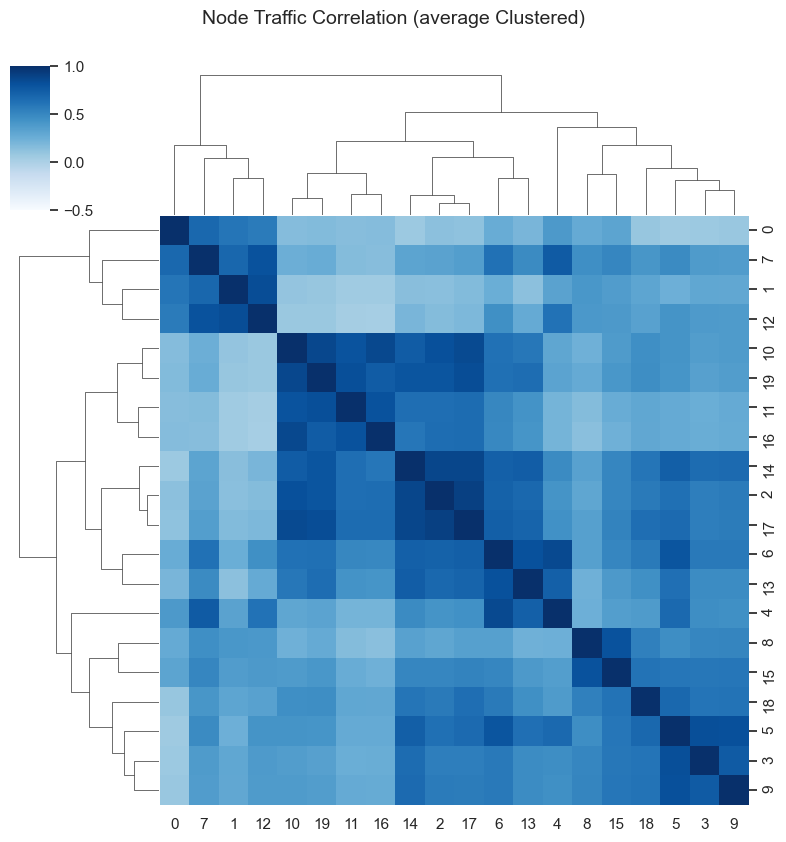

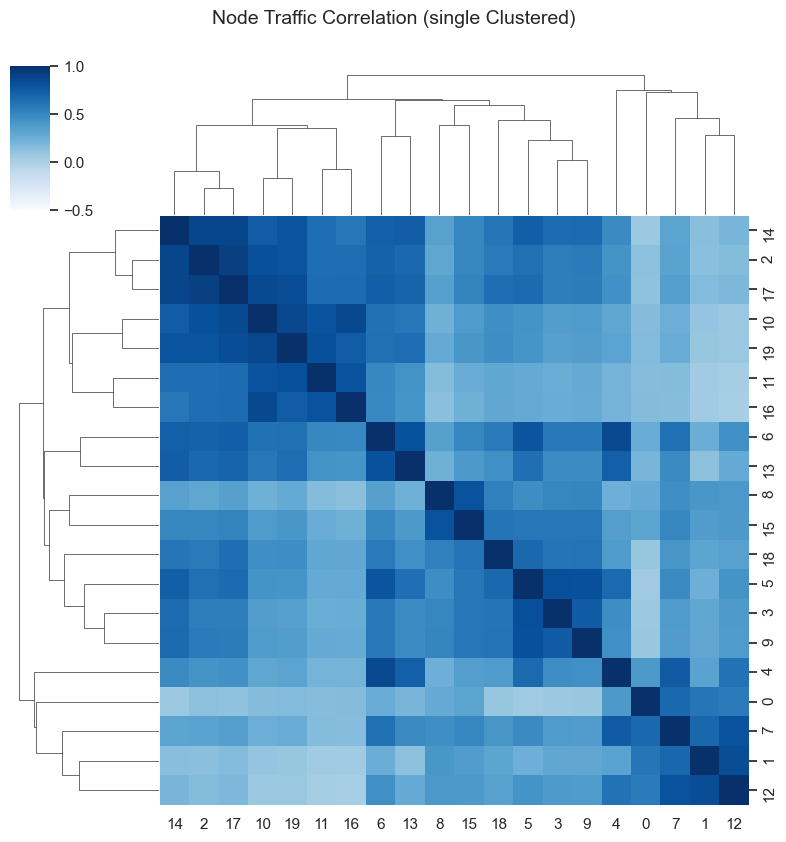

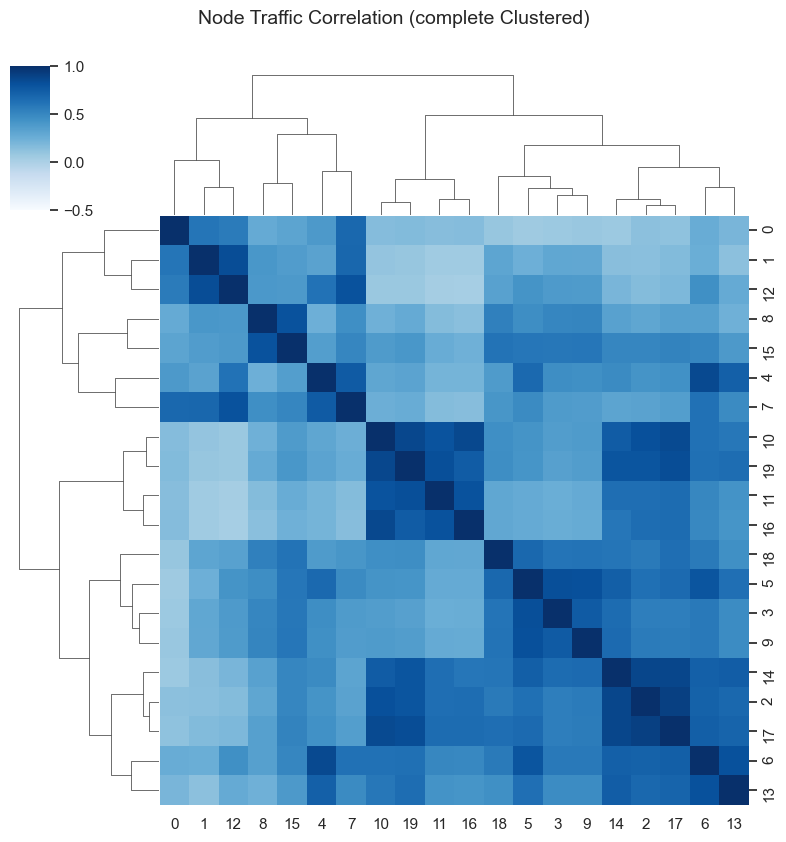

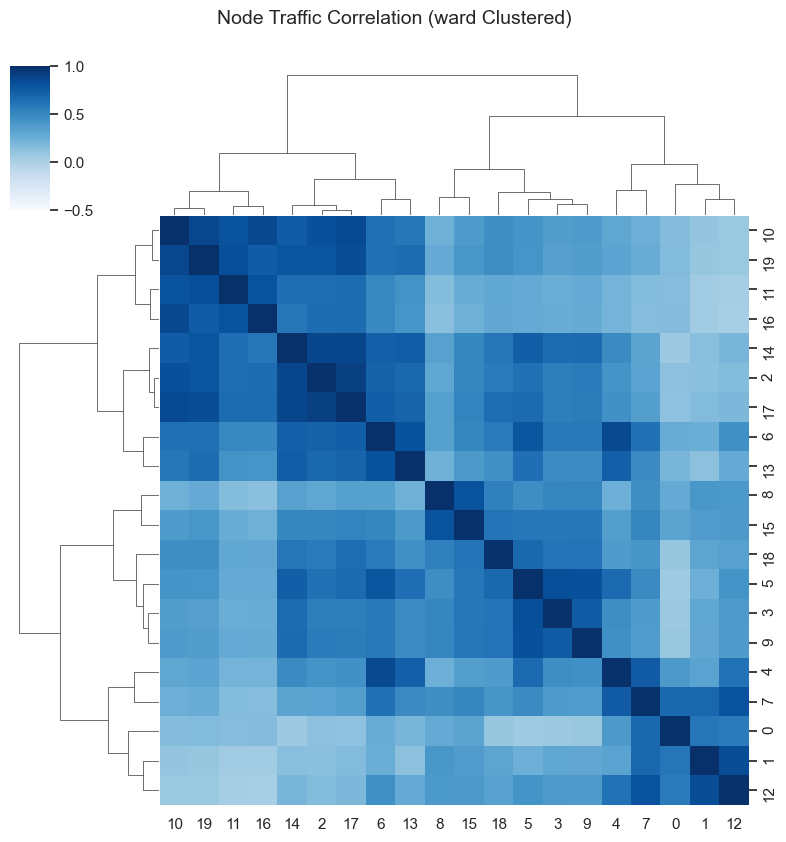

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# corr_matrix: (N x N) shape correlation matrix (Pearson correlation coefficient)
traffic_data_mat = np.zeros((traffic_data.shape[0], len(converted_nodes), len(converted_nodes), traffic_data.shape[2]))
for i in range(traffic_data.shape[1]):
    u, v = node_idx_map[i]
    traffic_data_mat[:, u, v, :] = traffic_data[:, i, :]

# Create time series data per node by summing along the destination axis
node_time_series = np.sum(traffic_data_mat[:, :, :, 0], axis=2)  # shape: (T, N)
# (Alternatively, to analyze incoming traffic per node, use axis=1 instead.)

# 2. Compute correlation matrix (Pearson correlation coefficient) for node time series data
# np.corrcoef computes correlation across rows/columns, so transpose to treat each column as a time series
corr_matrix = np.corrcoef(node_time_series.T)

sns.set_theme(style='white')

clustering_methods = ['average', 'single', 'complete', 'ward']
for clustering_method in clustering_methods:
    # Use clustermap function
    g = sns.clustermap(
        corr_matrix,
        method=clustering_method,
        metric='euclidean', # Distance metric (euclidean, cityblock, etc.)
        cmap='Blues',
        vmin=-0.5,
        vmax=1,
        figsize=(8, 8)
    )
    g.fig.suptitle(f"Node Traffic Correlation ({clustering_method} Clustered)", fontsize=14, y=1.05)
    g.ax_heatmap.set_aspect('equal')
    plt.show()
